## <b> ARMA

The preceding two sections describe the auto-regressive model AR(p), which <b> regresses on its own lagged terms</b>  and moving average model MA(q) builds a <b> function of error terms</b>  of the past. The <b>AR(p)</b> models tend to capture the <b>mean reversion effect</b> whereas <b>MA(q)</b> models tend to capture the <b> shock effect in error</b>  ,which are not normal or unpredicted events. Thus, the ARMA model combines the power of AR and MA components together. An ARMA(p, q) time series forecasting model incorporates the pth order AR and qth order MA model, respectively.

The ARMA(p, q) model is denoted as follows:
\begin{align}
x_{t} & = α + ø_{1}x_{t-1} + ø_{2}x_{t-2} + ... + ø_{p}x_{t-p} - ø_{1}∈_{t-1} - ø_{2}∈_{t-2} - ... - ø_{p}∈_{t-p} + ∈_{t}\\
\end{align}

Here, Φ and θ represent AR and MA coefficients. The α and εt captures the intercept and error at time t. 

In [1]:
# Load modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process
import statsmodels.api as sm

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


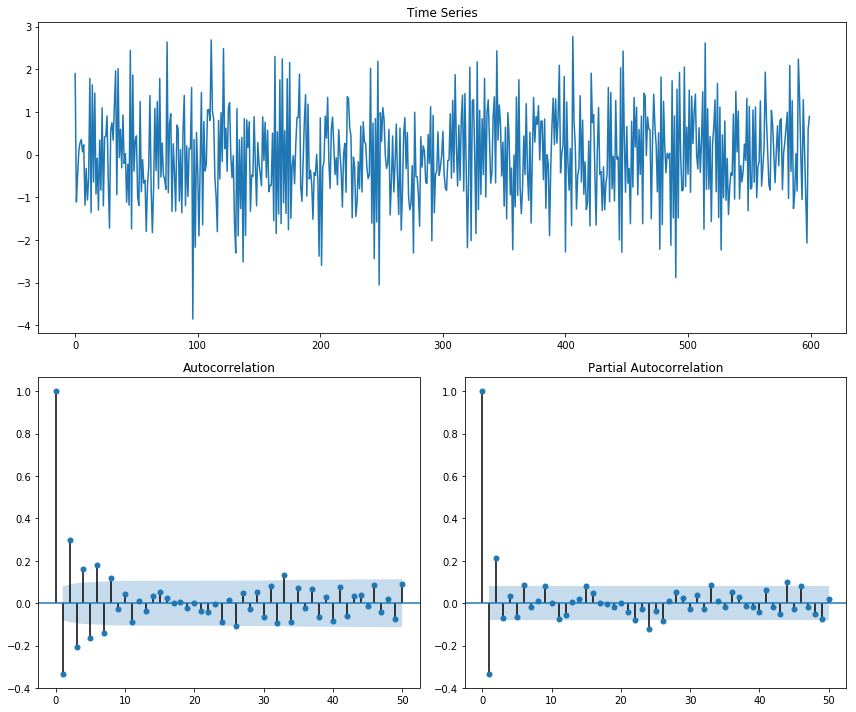

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    
        
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

Sales processes in general follow an ARMA(1,1) model as sales in time t is a function of prior sales happening in time t-1, which plays a role in the AR component. The MA component of ARMA(1,1) is caused due to time-based campaigns launched by the company, such as distribution of coupons will lead to moving average effect to the process as sales will increases temporarily and the change in sales effect is captured by the moving average component. 

Some of the thumb rules that can be used to determine the order of ARMA components are as follows:
- Autocorrelation is exponentially decreasing and PACF has significant correlation at lag 1, then use the p parameter
- Autocorrelation is forming a sine-wave and PACF has significant correlation at lags 1 and 2, then use second-order value for p
- Autocorrelation has significant autocorrelation and PACF has exponential decay, then moving average is present and the q parameter needs to be set up
- Autocorrelation shows significant serial correlation and the PACF shows sine- wave pattern, then set up a moving average q parameter

In ARMA(1,1) time series data, as both ACF and PACF have shown sine-wave pattern, p and q both parameters are affecting the time series signal. The impact of lags can be computed using impulse-response curve, as shown below

Text(0.5,0,'Lag')

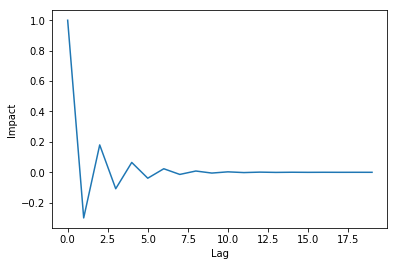

In [3]:
# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [4]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc'
)
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -855.829
Method:                           mle   S.D. of innovations              1.007
Date:                Sat, 02 May 2020   AIC                           1717.658
Time:                        23:05:19   BIC                           1730.848
Sample:                             0   HQIC                          1722.793
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.8301      0.049    -16.992      0.000      -0.926      -0.734
ma.L1.y        0.5881      0.071      8.233      0.000       0.448       0.728
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2046           +0.0000j            1.2046            0.5000
MA.1           -1.7003           +0.0000j            1.7003            0.5000
-----------------------------------------------------------------------------
"""

<b>Alkaline information criteria (AIC)</b> is another indicator used to evaluate model performance with an objective to minimize AIC. To set up a data-driven evaluation for p and q orders, AIC can be used as a criteria. An illustration of AIC minimization on ARMA(1,1) dataset is shown below

In [5]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0, 3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])
aicVal
# ARMA(1,1) is a simpler model with less degree of freedom (DOF); 
# thus, ARMA(1,1) will be preferred over other complex models like ARMA(1, 1) 
# when difference is not very high in AIC

[[1, 0, 1749.0674437666626],
 [1, 1, 1717.6576718570377],
 [1, 2, 1719.5856014984988],
 [2, 0, 1722.9868517593652],
 [2, 1, 1719.5631112450092],
 [2, 2, 1720.9484650136426]]

Let's illustrate an ARMA model using real-time series data. The dataset selected for illustration is IBM stock prices data from 1962 to 1965.

In [6]:
# Load Dataset
ibm_df = pd.read_csv(
    '../Data files/ibm-common-stock-closing-prices.csv'
)
ibm_df.head(5 )

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


         Date  Close_Price
0  1962-01-02       572.00
1  1962-01-03       577.00
2  1962-01-04       571.25
3  1962-01-05       560.00
4  1962-01-08       549.50


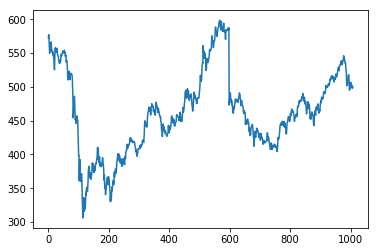

In [7]:
# Rename the second column
ibm_df.rename(columns={
    'IBM common stock closing prices': 'Close_Price'
}, inplace=True)
print(ibm_df.head(5))
ibm_df.Close_Price.plot()

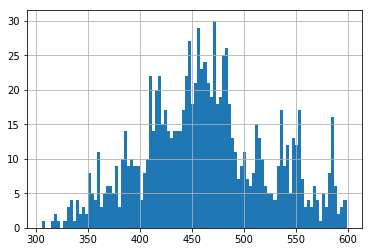

In [8]:
ibm_df.Close_Price.hist(bins=100)

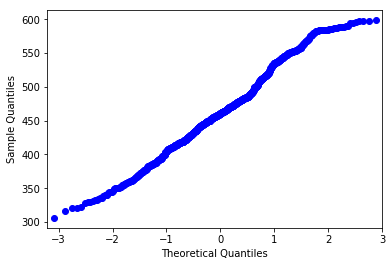

In [9]:
# QQ plot and probability plot
# The QQ-plot for the signal helps you evaluate the normality assumption.
axarr = sm.qqplot(ibm_df['Close_Price'], line='s')

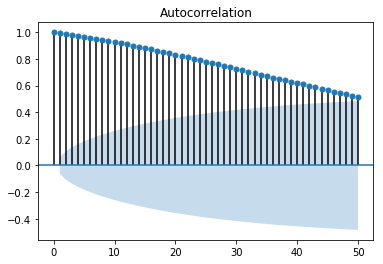

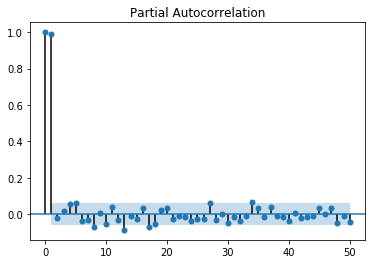

In [10]:
# Plot ACF and PACF
ibm_df=ibm_df.dropna()
axarr = plot_acf(ibm_df.Close_Price, lags=50)
axarr = plot_pacf(ibm_df.Close_Price, lags=50)

The ACF is linearly decaying, showing a strong serial correlation; however, the partial autocorrelation shows only one step dependency. Also, as the chart shows a positive autocorrelation, correction should be done using the AR component with first-order correlation. The QQ-plot for the signal helps you evaluate the normality assumption.

In [11]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0, 3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])
aicVal

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[[1, 0, 6702.766710082229],
 [1, 1, 6704.704833955866],
 [1, 2, 6706.643594203362],
 [2, 0, 6704.705792807945],
 [2, 1, 6705.736896148149],
 [2, 2, 6707.728881366259]]

In [12]:
# The AIC score baove recommends a model of ARMA(1,0) with AIC score of 6702.7
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Sat, 02 May 2020   AIC                           6702.767
Time:                        23:05:21   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0,0.5,'Closing price')

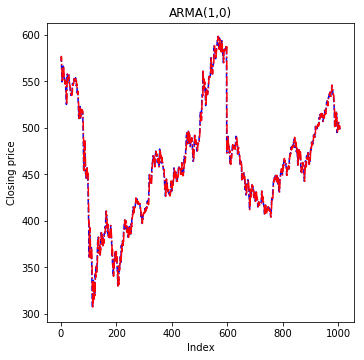

In [13]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '--', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '-.', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')

One of the major limitations of these models are that they ignore the volatility factor making the signal non-stationary. The AR modeling is under consideration process is stationary, that is, error term is IID and follows normal distribution εt ∼ N(0,σ2 ) and |Φ|<1. The |Φ|<1 ε condition makes the time series a finite time series as the effect of more recent observations in time series would be higher as compared to prior observations. The series that do not satisfy these assumptions fall into non-stationary series. The ARIMA discussed in the next section takes into account scenarios that are non-stationary for the forecasting.